In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import lu

# Практическое задание по теме "Введение в линейную алгебру"
https://docs.google.com/document/d/1DirQtAXL8-vwD4eaogN89pW2h3xN3ZtO25sDIs-wwqU/edit#heading=h.gjdgxs

## 5.1 (на листочке)
Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A∙B.

Вычислите, по возможности не используя программирование: (5Е)–1, где Е – единичная матрица размера 5х5.

In [5]:
E = np.identity(5)
print(E)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [8]:
print(np.linalg.inv(5*E))

[[ 0.2  0.   0.   0.   0. ]
 [ 0.   0.2  0.   0.   0. ]
 [ 0.   0.   0.2  0.   0. ]
 [-0.  -0.  -0.   0.2 -0. ]
 [ 0.   0.   0.   0.   0.2]]


## 5.2. (на листочке)
Вычислите определитель:
\begin{pmatrix}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9
\end{pmatrix}

In [11]:
A5_2 = np.array([[1,2,3], [4,0,6],[7,8,9]])
np.linalg.det(A5_2)

59.999999999999986

## 5.3.

### 1. Вычислите матрицу, обратную данной:
\begin{pmatrix}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9
\end{pmatrix}

In [9]:
A5_3 = np.array([[1,2,3], [4,0,6],[7,8,9]])
np.linalg.inv(A5_3)

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

### 2. Приведите пример матрицы 4х4, ранг которой равен 1.

## 5.4.
Вычислите скалярное произведение двух векторов:  
(1, 5)  и  (2, 8)

In [17]:
a = np.array([1,5])
b = np.array([2,8])

np.dot(a, b)

42

## 5.5
Вычислите смешанное произведение трех векторов:
(1, 5, 0), (2, 8, 7) и (7, 1.5, 3) 


In [13]:
a = np.array([1,5,0])
b = np.array([2,8,7])
c = np.array([7,1.5,3])
print(c * np.dot(a, b))

[294.  63. 126.]


# Практическое задание по теме "Системы линейных алгебраических уравнений":
https://docs.google.com/document/d/1n_aHRBF6McVWJUM1YMnqqJD6HocVxjRJM2e7cAajHnc/edit

## 1. Решите линейную систему:
<img src="https://github.com/koryagin2006/GB_Course_Introduction_to_Higher_Mathematics/blob/master/img/les_7_1.png?raw=1" alt="Drawing" style="width: 300px;">

In [0]:
A1 = np.array([[1,2,3],[4,0,6],[7,8,9]])
B1 = np.array([12,2,1])

Решение

In [3]:
X1 = np.linalg.solve(A1,B1)

for i in range(3):
    print(f'x_{i+1} = {round(X1[i], 5)}')
# Сделал с округлением для читаемости

x_1 = -9.2
x_2 = 0.9
x_3 = 6.46667


## 2. Найдите псевдорешение:
```
x + 2y – z = 1
3x – 4y = 7
8x – 5y + 2z = 12
2x – 5z = 7
11x +4y – 7z = 15
```

In [4]:
A2 = np.array([[1,2,-1],
              [3,-4,0],
              [8,-5,2],
              [2,0,-5],
              [11,4,-7]])
B2 = np.array([1,7,12,7,12])
print('Ранг =',np.linalg.matrix_rank(A2, 0.0001))

Ранг = 3


Решение

In [7]:
X2 = np.linalg.lstsq(A2,B2, rcond=None)

for i in range(3):
    print(f'x_{i+1} = {round(X2[0][i], 5)}')

x_1 = 0.96773
x_2 = -1.11719
x_3 = -0.89888


In [6]:
# Проверка
np.around(np.dot(A2, [X2[0][0], X2[0][1], X2[0][2]]), decimals=2)

array([-0.37,  7.37, 11.53,  6.43, 12.47])

## 3. Сколько решений имеет линейная система:
<img src="https://github.com/koryagin2006/GB_Course_Introduction_to_Higher_Mathematics/blob/master/img/les_7_2.png?raw=1" alt="Drawing" style="width: 300px;">

In [101]:
A3 = np.arange(1,10).reshape(3,3)
B3 = np.array([[12,2,1]])

Решение

In [102]:
C3 = np.concatenate((A3,B3.T), axis=1)

if np.linalg.matrix_rank(A3, 0.0001) == np.linalg.matrix_rank(C3, 0.0001):
  print('СЛАУ совместна')
else:
  print('СЛАУ несовместна - не имеет решений')

СЛАУ несовместна - не имеет решений


Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.


In [103]:
# изменим
B3_2 = np.array([[0,0,0]], float)

C3_2 = np.concatenate((A3,B3_2.T), axis=1)
print('Ранг А = ',np.linalg.matrix_rank(A3, 0.0001)) 
print('Ранг С = ',np.linalg.matrix_rank(C3_2, 0.0001))

np.linalg.solve(A3,B3_2)

Ранг А =  2
Ранг С =  2


ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 3)

## 4. Вычислите LU-разложение матрицы:
<img src="https://github.com/koryagin2006/GB_Course_Introduction_to_Higher_Mathematics/blob/master/img/les_7_3.png?raw=1" alt="Drawing" style="width: 100px;">

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [26]:
A4 = np.array([[1,2,3],
               [2,16,21],
               [4,28,73]])

In [49]:
print('P =\n',lu(A4)[0])
print('L =\n',lu(A4)[1])
print('U =\n',lu(A4)[2])

P =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L =
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U =
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [59]:
B4 = np.array([3,4,8])
X4 = np.linalg.lstsq(A4,B4, rcond=None)

for i in range(3):
    print(f'x_{i+1} = {round(X4[0][i], 5)}')

x_1 = 3.34259
x_2 = -0.14352
x_3 = -0.01852


## 5. Найдите нормальное псевдорешение недоопределенной системы:
```
x + 2y – z = 1
8x – 5y + 2z = 12
```
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [62]:
A5 = np.array([[1,2,-1],[8,-5,2]])
B5 = np.array([1,12])
np.linalg.lstsq(A5,B5, rcond=None)[0]

array([ 1.38191882, -0.18081181,  0.0202952 ])

Решение

```
z = x + 2y - 1
8x - 5y + 2(x+2y-1) = 12
8x +2x -2-12  = y
10x-14 = y
z = x + 2(10x-14)-1
z  =21x -29
```
```
y = 10x - 14
z = 21x - 29
```

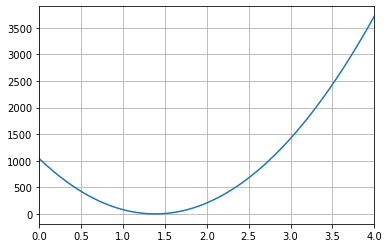

In [69]:
def Q(x,y,z):
    return (x**2 + y**2 + z**2)

X = np.linspace(0,4, 200)
Y = 10*X - 14
Z = 21*X - 29
plt.xlim(0,4)
plt.plot(X, Q(X,Y,Z))
plt.grid();

## 6. Найдите одно из псевдорешений вырожденной системы:
<img src="https://github.com/koryagin2006/GB_Course_Introduction_to_Higher_Mathematics/blob/master/img/les_7_4.png?raw=1" alt="Drawing" style="width: 300px;">
Попробуйте также отыскать и нормальное псевдорешение.

In [104]:
A6 = np.arange(1,10).reshape(3,3)
B6 = np.array([[2,5,11]])
C6 = np.concatenate((A6,B6.T), axis=1)
print(C6)
print(np.linalg.matrix_rank(A6, 0.0001), np.linalg.matrix_rank(C6, 0.0001))
print('')

np.linalg.lstsq(A6,B6, rcond=None)[0]
# X6 = np.linalg.lstsq(A6,B6, rcond=None)[0]
# for i in range(3):
#     print(f'x_{i+1} = {round(X6[0][i], 5)}')

[[ 1  2  3  2]
 [ 4  5  6  5]
 [ 7  8  9 11]]
2 3



LinAlgError: Incompatible dimensions